# Linear Model Algorithm

## Import Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append("../")

from src.linear_model import LinearRegression

## A. Linear Regression

In [3]:
# Data Input
X = np.array([[1, 1, 4, 10], [1, 2, 10, 11], [2, 2, 13, 15], [2, 3, 7, 9]])
y = np.dot(X, np.array([1, 2, 4, 4])) + 3

# Find model parameter using ols equation
print("======= OLS Equation =======")
reg = LinearRegression(fit_intercept=True, optimizer="ols")
reg.fit(X, y)

print(f"y : {y}")
print(reg.coef_)
print(reg.intercept_)
print(reg.predict(np.array([[1,1,4,10]])))

# Find model parameter using gradient descent
print("======= Gradient Descent =======")
reg = LinearRegression(fit_intercept=True, optimizer="gradient-descent", learning_rate=1e-3, num_iters=100000)
reg.fit(X, y)

print(f"y : {y}")
print(reg.coef_)
print(reg.intercept_)
print(reg.predict(np.array([[1,1,4,10]])))

======= OLS Equation =======
y : [ 62  92 121  75]
[0.42251314 2.64165207 3.85028118 4.25666083]
0.9681017792938107
[62.]
======= Gradient Descent =======
Cost at iteration 0 is : 2481.147183140625
Cost at iteration 10000 is : 0.00906879256047869
Cost at iteration 20000 is : 0.0018207638924570735
Cost at iteration 30000 is : 0.0003655614277957406
Cost at iteration 40000 is : 7.339510523344765e-05
Cost at iteration 50000 is : 1.4735803787392548e-05
Cost at iteration 60000 is : 2.9585612360527404e-06
Cost at iteration 70000 is : 5.940011630051065e-07
Cost at iteration 80000 is : 1.192597865995715e-07
Cost at iteration 90000 is : 2.3944223656551034e-08
y : [ 62  92 121  75]
[0.42280784 2.64152134 3.85028112 4.2566551 ]
0.9679760178491651
[61.99998071]


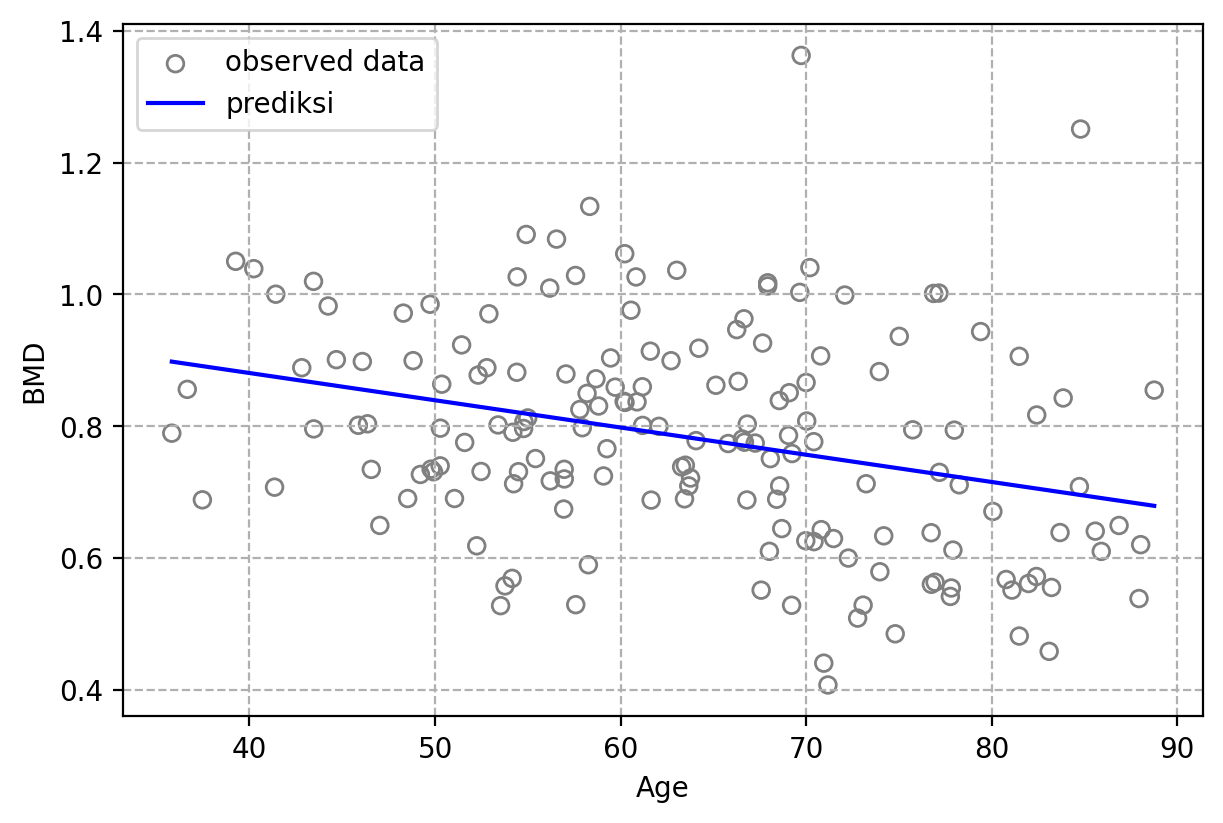

In [6]:
# Calculate using OLS Equation
# Prepare data
df = pd.read_csv('../../data/raw/bmd.csv')
X_train = df[['age']]
y_train = df['bmd']
X_test = X_train.copy() + 1e-6

# Create prediction
reg = LinearRegression(optimizer="ols")
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, dpi=200)

ax.scatter(X_train, y_train, c="none", edgecolors='grey', label="observed data")
idx_sort = np.argsort(X_test['age']).to_list()
X_test_sorted = X_test.loc[idx_sort]
y_pred_sorted = y_pred[idx_sort]
ax.plot(X_test_sorted['age'], y_pred_sorted, c='b', label="prediksi")

ax.legend()
ax.grid(linestyle="--")
ax.set_xlabel("Age")
ax.set_ylabel("BMD")
plt.show()

Cost at iteration 0 is : 0.16576483276875192
Cost at iteration 100000 is : 0.013586466813102464
Cost at iteration 200000 is : 0.012549376226583878
Cost at iteration 300000 is : 0.012491743152064895
Cost at iteration 400000 is : 0.012488540373713915
Cost at iteration 500000 is : 0.012488362389296962
Cost at iteration 600000 is : 0.01248835249836815
Cost at iteration 700000 is : 0.01248835194871063
Cost at iteration 800000 is : 0.012488351918165129
Cost at iteration 900000 is : 0.012488351916467657


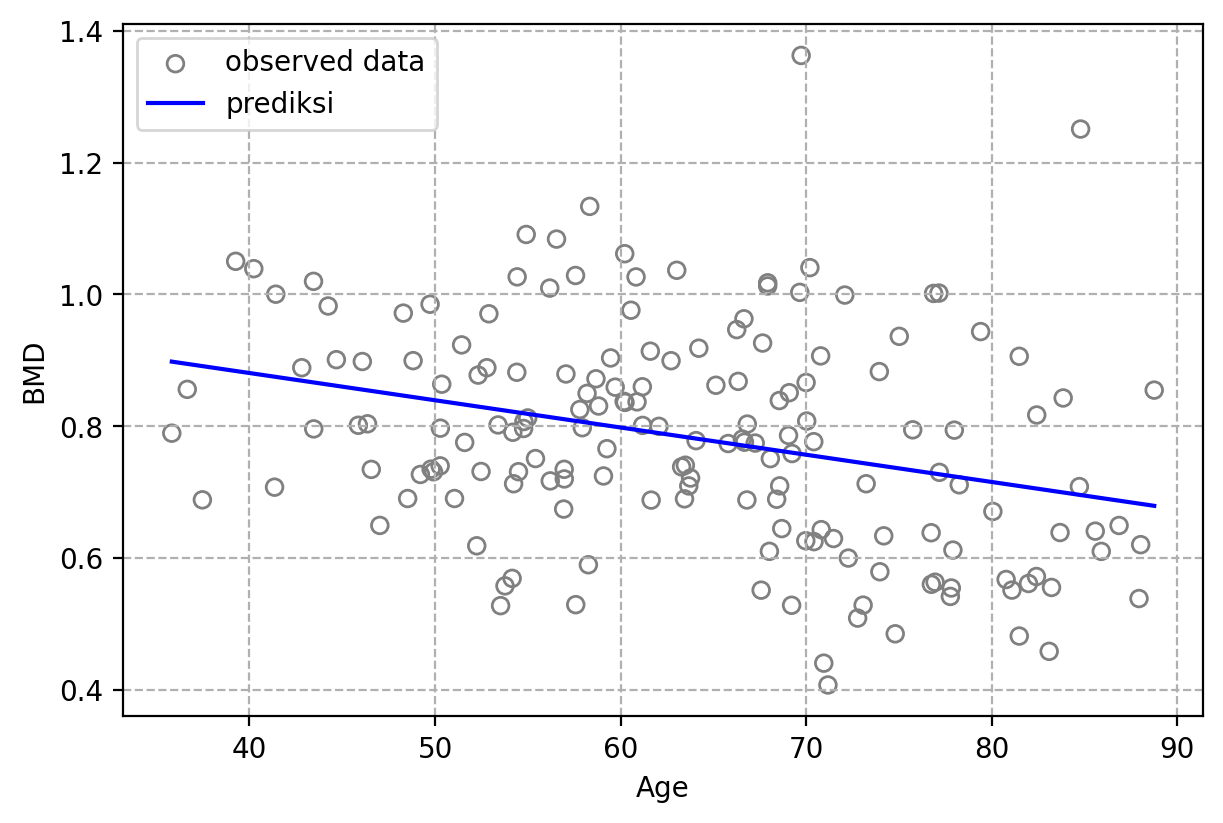

In [18]:
# Calculate using gradient descent equation
# Prepare data
df = pd.read_csv('../../data/raw/bmd.csv')
X_train = df[['age']]
y_train = df['bmd']
X_test = X_train.copy() + 1e-6

# Create prediction
reg = LinearRegression(optimizer="gradient-descent", learning_rate=4e-4, num_iters=1000000)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, dpi=200)

ax.scatter(X_train, y_train, c="none", edgecolors='grey', label="observed data")
idx_sort = np.argsort(X_test['age']).to_list()
X_test_sorted = X_test.loc[idx_sort]
y_pred_sorted = y_pred[idx_sort]
ax.plot(X_test_sorted['age'], y_pred_sorted, c='b', label="prediksi")

ax.legend()
ax.grid(linestyle="--")
ax.set_xlabel("Age")
ax.set_ylabel("BMD")
plt.show()

NOTE : OLS Execution time is more faster than gradient descent for Linear Regression case

## B. Rigde Regression

In [2]:
from src.linear_model import Ridge

In [11]:
X = np.array([[1, 1, 4, 10], [1, 2, 10, 11], [2, 2, 13, 15], [2, 3, 7, 9]])
y = np.dot(X, np.array([1, 2, 4, 4])) + 3

print("========== OLS EQUATION ==========")
clf = Ridge(alpha=1.0, optimizer="ols")
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.predict([[1.0, 2.0, 10.0, 11.0]]))

print("========== GRADIENT DESCENT ==========")
clf = Ridge(alpha=1.0, optimizer="gradient-descent")
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.predict([[1.0, 2.0, 10.0, 11.0]]))

========== OLS EQUATION ==========
[1.11006848 0.69464874 4.37255897 3.31169161]
10.022318031956416
[92.67588131]
========== GRADIENT DESCENT ==========
Cost at iteration 0 is : 4053.9029877371613
Cost at iteration 1000 is : 55.70713691273978
Cost at iteration 2000 is : 6.553447961506428
Cost at iteration 3000 is : 5.920540341497118
Cost at iteration 4000 is : 5.884816051019576
Cost at iteration 5000 is : 5.8574169501027535
Cost at iteration 6000 is : 5.8310631878416
Cost at iteration 7000 is : 5.805622830871802
Cost at iteration 8000 is : 5.781054018382412
Cost at iteration 9000 is : 5.757318117503548
[0.66552717 0.92579672 3.77469318 4.61651648]
0.4178305507806544
[91.46356425]


## C. Lasso Regression

In [2]:
from src.linear_model import Lasso

In [3]:
# REGRESSION CASE - 1
# -------------------
X = np.array([[0,0], [1,1], [2,2]])
y = np.array([0, 1, 2])

clf = Lasso(lamda=0.1)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)

0.17999999999999983
0.2879999999999996
0.35279999999999945
0.39167999999999936
0.4150079999999994
0.4290047999999995
0.4374028799999996
0.4424417279999996
0.4454650367999997
0.4472790220799999
0.4483674132479998
0.4490204479487997
0.44941226876927964
0.4496473612615677
0.4497884167569407
0.44987305005416445
0.4499238300324987
0.44995429801949904
0.44997257881169905
0.44998354728701906
0.4499901283722112
0.4499940770233266
0.4499964462139959
0.44999786772839745
0.44999872063703816
0.4499992323822227
0.44999953942933346
0.44999972365759977
0.4499998341945597
0.4499999005167358
0.4499999403100414
0.4499999641860246
0.44999997851161466
0.44999998710696876
0.4499999922641811
0.44999999535850854
0.4499999972151051
0.449999998329063
0.4499999989974377
0.4499999993984626
0.44999999963907744
0.4499999997834463
0.44999999987006767
0.44999999992204043
0.44999999995322415
0.4499999999719345
0.44999999998316054
0.44999999998989615
0.4499999999939376
0.4499999999963623
0.44999999999781715
0.44999999

In [4]:
# REGRESSION CASE - 1
# -------------------
X = np.array([[0,0], [1,1], [2,2]])
y = np.array([0, 1, 2])

clf = Lasso(lamda=0.1)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)

Calculated theta : 0.9400000000000001
Calculated theta : 0.0
Calculated theta : 0.17999999999999983
Calculated theta : 0.8320000000000002
Calculated theta : 0.0
Calculated theta : 0.5039999999999994
Calculated theta : 0.6376000000000003
Calculated theta : 8.881784197001253e-17
Calculated theta : 1.0871999999999988
Calculated theta : 0.2876800000000006
Calculated theta : 8.881784197001253e-17
Calculated theta : 2.136959999999998
Calculated theta : -0.22217599999999876
Calculated theta : 0.0
Calculated theta : 3.6665279999999965
Calculated theta : -1.139916799999998
Calculated theta : 0.0
Calculated theta : 6.4197503999999945
Calculated theta : -2.7918502399999965
Calculated theta : -2.220446049250313e-16
Calculated theta : 11.37555071999999
Calculated theta : -5.765330431999994
Calculated theta : -8.437694987151189e-16
Calculated theta : 20.295991295999983
Calculated theta : -11.11759477759999
Calculated theta : 0.0
Calculated theta : 36.35278433279997
Calculated theta : -20.75167059967

/home/st_yudi/portfolio/11_Machine_Learning_From_Scratch/source_code/notebook/../src/linear_model/lasso.py:122: RuntimeWarning: overflow encountered in square
  err_rss =  (1/(2*n_samples)) * (np.sum((y - X@theta)**2))


Calculated theta : -1.0743126033055089e+156
Calculated theta : 0.0
Calculated theta : 3.2229378099165266e+156
Calculated theta : -1.933762685949916e+156
Calculated theta : 7.621456421669903e+139
Calculated theta : 5.8012880578497484e+156
Calculated theta : -3.480772834709849e+156
Calculated theta : 0.0
Calculated theta : 1.0442318504129547e+157
Calculated theta : -6.265391102477728e+156
Calculated theta : 0.0
Calculated theta : 1.8796173307433183e+157
Calculated theta : -1.1277703984459912e+157
Calculated theta : 1.8291495412007766e+141
Calculated theta : 3.383311195337973e+157
Calculated theta : -2.0299867172027844e+157
Calculated theta : 4.2680155961351454e+141
Calculated theta : 6.089960151608352e+157
Calculated theta : -3.6539760909650123e+157
Calculated theta : 9.755464219737476e+141
Calculated theta : 1.0961928272895033e+158
Calculated theta : -6.577156963737021e+157
Calculated theta : 9.755464219737476e+141
Calculated theta : 1.9731470891211058e+158
Calculated theta : -1.1838882